In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

from datasets import load_dataset

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Dropping duplicating rows
df_unique = df.drop_duplicates().copy()

# Data cleaning
df_unique['job_posted_date'] = pd.to_datetime(df_unique['job_posted_date'])
df_unique['job_skills'] = df_unique['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [8]:
# Filter data for US only
df_US = df_unique[(df_unique['job_country']== 'United States')].dropna(subset=['salary_year_avg'])

In [15]:
# Filtering the Top 6 job roles with the most postings
job_titles = df_US['job_title_short'].value_counts().index[0:6].to_list()

In [18]:
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [22]:
job_top6_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index.to_list()

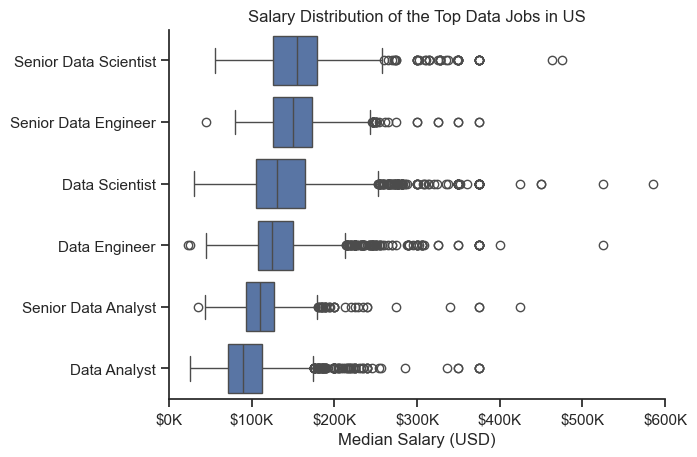

In [35]:
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short',order=job_top6_order)
sns.set_theme(style='ticks')
sns.despine()
plt.xlabel('Median Salary (USD)')
plt.ylabel('')
plt.title('Salary Distribution of the Top Data Jobs in US')
plt.xlim(0,600000)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos :f'${int(x/1000)}K'))
plt.show()

In [40]:
df_DA_US = df_US_top6[df_US_top6['job_title_short']=='Data Analyst']

df_DA_US = df_DA_US.explode('job_skills')

In [48]:
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False).head(10)
df_DA_top_demand = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False).head(10)
df_DA_top_demand.sort_values('median', ascending=False, inplace=True)

In [55]:
df_DA_top_demand

,count,median
job_skills,,
python,1431,97500.00
tableau,1363,93000.00
r,893,92500.00
sql server,286,92500.00
sql,2507,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


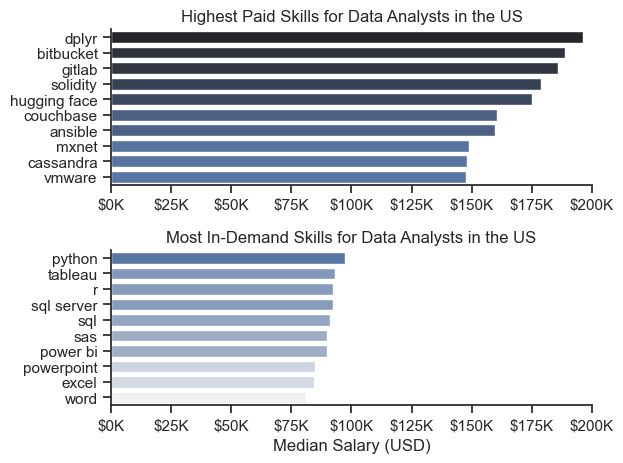

In [64]:
fig,ax=plt.subplots(2,1)
ax: list[Axes]  # Type hint for ax


sns.barplot(data=df_DA_top_pay, x='median', y='job_skills', ax=ax[0], hue='median', palette='dark:b_r', width=0.75)
ax[0].set_title('Highest Paid Skills for Data Analysts in the US')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].legend().remove()
ax[0].set_xlim(0,200000)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f'${int(x/1000)}K'))

sns.barplot(data=df_DA_top_demand, x='median', y='job_skills', ax=ax[1], hue='median', palette='light:b', width=0.75)
ax[1].set_title('Most In-Demand Skills for Data Analysts in the US')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].legend().remove()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
sns.despine()
fig.tight_layout()
plt.show()
